# AM 205 - Assignment 1
## By Jonathan Guillotte-Blouin

In [1]:
import numpy as np
import numpy.linalg as la
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from skimage import io

### Question 1: Polynomial approximation of the gamma function

We have the following points:

| n   | 1 | 2 | 3 | 4 |  5 |
|-----|:-:|---|:-:|---|:--:|
| $\tau(n)$ | 1 | 1 | 2 | 6 | 24 |

#### a) Write the interpolant of $\tau(n)$ as $g(x) = \sum_{k=0}^4g_kx^k$

We first want to find the coefficients

$$g_0 = 1 \frac{(x - 2)(x - 3)(x - 4)(x-5)}{(1 - 2)(1 - 3)(1 - 4)(1 - 5)} = \frac{(x - 2)(x - 3)(x - 4)(x-5)}{24}$$

$$g_1 = 1 \frac{(x - 1)(x - 3)(x - 4)(x-5)}{(2 - 1)(2 - 3)(2 - 4)(2 - 5)} = -\frac{(x - 1)(x - 3)(x - 4)(x-5)}{6}$$

$$g_2 = 2 \frac{(x - 1)(x - 2)(x - 4)(x-5)}{(3 - 1)(3 - 2)(3 - 4)(3 - 5)} = \frac{(x - 1)(x - 2)(x - 4)(x-5)}{2}$$

$$g_3 = 6 \frac{(x - 1)(x - 2)(x - 3)(x-5)}{(4 - 1)(4 - 2)(4 - 3)(4 - 5)} = -(x - 1)(x - 2)(x - 3)(x-5)$$

$$g_4 = 24 \frac{(x - 1)(x - 2)(x - 3)(x - 4)}{(5 - 1)(5 - 2)(5 - 3)(5 - 4)} = (x - 1)(x - 2)(x - 3)(x - 4)$$

Our interpolant therefore is

$$g(x) = \frac{(x - 2)(x - 3)(x - 4)(x-5)}{24} - \frac{(x - 1)(x - 3)(x - 4)(x-5)}{6} + \frac{(x - 1)(x - 2)(x - 4)(x-5)}{2} - (x - 1)(x - 2)(x - 3)(x-5) + (x - 1)(x - 2)(x - 3)(x - 4)$$

In [3]:
def g(x):
    g0 = (x - 2)*(x - 3)*(x - 4)*(x - 5)/24
    g1 = -(x - 1)*(x - 3)*(x - 4)*(x - 5)/6
    g2 = (x - 1)*(x - 2)*(x - 4)*(x - 5)/2
    g3 = -(x - 1)*(x - 2)*(x - 3)*(x - 5)
    g4 = (x - 1)*(x - 2)*(x - 3)*(x - 4)
    
    return g0 + g1 + g2 + g3 + g4

print("Let's try our interpolant with the five given data points")
for x in range (1, 6):
    print("g({}) = {}".format(x, g(x)))

Let's try our interpolant with the five given data points
g(1) = 1.0
g(2) = 1.0
g(3) = 2.0
g(4) = 6.0
g(5) = 24.0


#### b) Approximate on $(n, log(\tau(n))$ for n=1,2,3,4,5 called $p(x)$. Then, define the approximation $h(x) = exp(p(x))$.

$$p_0 = ln(1) \frac{(x - 2)(x - 3)(x - 4)(x-5)}{(1 - 2)(1 - 3)(1 - 4)(1 - 5)} = 0$$

$$p_1 = ln(1) \frac{(x - 1)(x - 3)(x - 4)(x-5)}{(2 - 1)(2 - 3)(2 - 4)(2 - 5)} = 0$$

$$p_2 = ln(2) \frac{(x - 1)(x - 2)(x - 4)(x-5)}{(3 - 1)(3 - 2)(3 - 4)(3 - 5)} = ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}$$

$$p_3 = ln(6) \frac{(x - 1)(x - 2)(x - 3)(x-5)}{(4 - 1)(4 - 2)(4 - 3)(4 - 5)} = -ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}$$

$$p_4 = ln(24) \frac{(x - 1)(x - 2)(x - 3)(x - 4)}{(5 - 1)(5 - 2)(5 - 3)(5 - 4)} = ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}$$

Our interpolant therefore is

$$p(x) = ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4} - ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6} + ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}$$

We can define $h(x) = e^{p(x)}$, so we get

$$h(x) = e^{ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4} - ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6} + ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

If we stick with this complex form of $h(x)$, we might get some error (the implementation is called `h`). If we simplify this, however...

$$h(x) = e^{ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}} e^{-ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}} e^{ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

$$h(x) = 2^{\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}} 6^{-\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}} 24^{\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

This last simplified form is what we call `h_simplified`.

In [28]:
def p(x):
    p2 = np.log(2) * (x - 1)*(x - 2)*(x - 4)*(x - 5) / 4
    p3 = -np.log(6) * (x - 1)*(x - 2)*(x - 3)*(x - 5) / 6
    p4 = np.log(24) * (x - 1)*(x - 2)*(x - 3)*(x - 4) / 24
    
    return p2 + p3 + p4

def h(x):
    return np.exp(p(x))
    
def h_simplified(x):
    h2 = 2 ** ((x - 1)*(x - 2)*(x - 4)*(x - 5)/4)
    h3 = 6 ** (-(x - 1)*(x - 2)*(x - 3)*(x - 5)/6)
    h4 = 24 ** ((x - 1)*(x - 2)*(x - 3)*(x - 4)/24)
    
    return h2 * h3 * h4

print("Let's try our interpolant with the five given data points")
for x in range (1, 6):
    print("h({}) = {}".format(x, h(x)))
    print("h_simplified({}) = {}".format(x, h_good(x)))

Let's try our interpolant with the five given data points
h(1) = 1.0
h_simplified(1) = 1.0
h(2) = 1.0
h_simplified(2) = 1.0
h(3) = 2.0
h_simplified(3) = 2.0
h(4) = 6.000000000000001
h_simplified(4) = 6.0
h(5) = 24.000000000000004
h_simplified(5) = 24.0


#### c) Plot $\tau(x)$, $g(x)$, and $h(x)$ on the interval $1 \leq x \leq 5$.

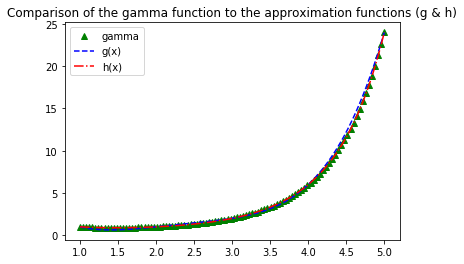

In [29]:
from scipy.special import gamma

domainPlot = np.linspace(1,5,100)
gammaPlotValues = [gamma(x) for x in domainPlot]
gPlotValues = [g(x) for x in domainPlot]
hPlotValues = [h(x) for x in domainPlot]

plt.title("Comparison of the gamma function to the approximation functions (g & h)")
plt.plot(domainPlot, gammaPlotValues, 'g^', domainPlot, gPlotValues, 'b--', domainPlot, hPlotValues, 'r-.');
plt.legend(["gamma", "g(x)", "h(x)"]);

#### d) Calculate the maximum relative error between $\tau(x)$ and $g(x)$, and between $\tau(x)$ and $h(x)$.

In [34]:
numSamples = 10000

domainError = np.linspace(1,5, numSamples)
gMaxError = 0
hMaxError = 0

# go through the sampling domain, and keep track of the maximum relative error for the two approximation functions
for x in domainError:
    trueValue = gamma(x)
    gRelativeError = abs(trueValue - g(x)) / trueValue
    hRelativeError = abs(trueValue - h(x)) / trueValue
    gMaxError = gMaxError if gMaxError >= gRelativeError else gRelativeError
    hMaxError = hMaxError if hMaxError >= hRelativeError else hRelativeError

print("Given {} sampling points at regular interval in [1,5]...".format(numSamples))
print("Maximum relative error of g(x) compared to gamma: ", gMaxError)
print("Maximum relative error of h(x) compared to gamma: ", hMaxError)

Given 10000 sampling points at regular interval in [1,5]...
Maximum relative error of g(x) compared to gamma:  0.2860987375664062
Maximum relative error of h(x) compared to gamma:  0.011527840157904373


Based on these sampling results, $g(x)$ seems to be less accurate than $h(x)$.

A hypothesis that I have is that $g(x)$ has 5 mathematical terms compared to 3 for $h(x)$ (in the exponent part). For the points in between the five given points (for instance, `1.23`), $g(x)$ could in the end produce more noise than $h(x)$.

### Question 2: Error bounds with Lagrange polynomials

#### a) Program and plot the Lagrange polynomial $p_{n-1}(x)$ of $f(x)$

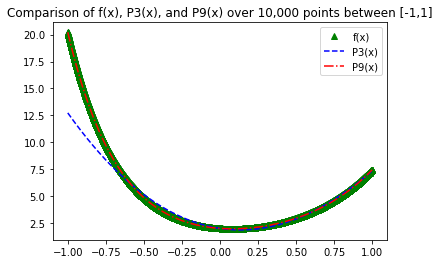

In [73]:
def f(x):
    return np.exp(-3*x) + np.exp(2*x)

# generates n Cheb points
def generateChebPoints(n):
    xs = [np.cos((2*j-1)*np.pi/(2*n)) for j in range(1, n)]
    return xs

# generates the list of denominators corresponding to the list of points (in this case, cheb points)
def generateDenominators(xs):
    denominators = []

    for i, xi in enumerate(xs):
        denominator = 1

        for j, xj in enumerate(xs):
            if i == j:
                continue
            
            denominator *= (xi - xj)
        
        denominators.append(denominator)
        
    return denominators

# when we run the approximation function, we want to generate the numerators
# this generates the numerator for a specific term `i` with `x=xi`, where the list of all xs is also given
def generateNumerator(xi, i, xs):
    numerator = 1

    for j, x in enumerate(xs):
        if i == j: 
            continue
        
        numerator *= (xi - x)
    
    return numerator

# this "main" function generates the approximation function `P`, made with `n` cheb points
# the approximation function returned therefore is of degree `n-1`
def generateP(n):
    xs = generateChebPoints(n+1)
    ys = [f(x) for x in xs]
    denominators = generateDenominators(xs)
    
    def P(x):
        result = 0

        for i, y in enumerate(ys):
            denominator = denominators[i]
            numerator = generateNumerator(x, i, xs)
            
            result += y * numerator / denominator
        
        return result
            
        
    return P

# this is the approximation function P of degree 3
P3 = generateP(4)
# this is the approximation function P of degree 9
P9 = generateP(10)

# here we plot
fDomainPlot = np.linspace(-1,1,10000)
fPlotValues = [f(x) for x in fDomainPlot]
P3PlotValues = [P3(x) for x in fDomainPlot]
P9PlotValues = [P9(x) for x in fDomainPlot]


plt.title("Comparison of f(x), P3(x), and P9(x) over 10,000 points between [-1,1]")
plt.plot(fDomainPlot, fPlotValues, 'g^', fDomainPlot, P3PlotValues, 'b--', fDomainPlot, P9PlotValues, 'r-.');
plt.legend(["f(x)", "P3(x)", "P9(x)"]);

#### b) Calculate $\|f - p_3\|_{\infty}$ by sampling the function 1,000 equally-spaced points over [-1,1].

In [79]:
samplingP3Domain = np.linspace(-1,1,1000)
fp3InfNorm = np.max([abs(f(x) - P3(x)) for x in samplingP3Domain])
fp9InfNorm = np.max([abs(f(x) - P9(x)) for x in samplingP3Domain])
print("||f - P3|| is ", fp3InfNorm)
print("||f - P9|| is ", fp9InfNorm)

||f - P3|| is  7.492325166942381
||f - P9|| is  0.0019167313535781716


### Question 3: The condition number of a matrix

*We assume that the matrix norm is defined as the Euclidian norm*

#### a) Find two 2 x 2 invertible matrices B and C such that $\kappa(B + C) < \kappa(B) + \kappa(C)$.

In [21]:
# helper function to calculate kappa
def kappa(A):
    invA = la.inv(A)
    return la.norm(A) * la.norm(invA)

B1 = np.matrix([[1,2],[3,4]])
C1 = np.matrix([[5,6],[7,8]])
print("B: {}\nC: {}\nk(B) + k(C): {}\nk(B+C) = {}\nTherefore, k(B + C) < k(B) + k(C)".format(B1, C1, kappa(B1) + kappa(C1), kappa(B1+C1)))

B: [[1 2]
 [3 4]]
C: [[5 6]
 [7 8]]
k(B) + k(C): 102.00000000000004
k(B+C) = 42.999999999999986
Therefore, k(B + C) < k(B) + k(C)


#### b) Find two 2 x 2 invertible matrices B and C such that $\kappa(B + C) > \kappa(B) + \kappa(C)$.

In [5]:
while True:
    B2 = np.random.rand(2,2)
    C2 = np.random.rand(2,2)
    
    # B or C is a singular matrix, start over
    if la.det(B2) == 0 or la.det(C2) == 0:
        continue
        
    kappaB = kappa(B2)
    kappaC = kappa(C2)
    kappaBC = kappa(B2 + C2)
    
    # our valid kappas don't satisfy the condition of question b), start over
    if kappaBC <= kappaB + kappaC:
        continue
        
    # we've made it here, our kappas satisfy the condition of question b). print the result and stop
    print("B: {}\nC: {}\nk(B) + k(C): {}\nk(B+C) = {}\nTherefore, k(B + C) > k(B) + k(C)".format(B2, C2, kappaB + kappaC, kappaBC))
    break

B: [[0.71149566 0.07477911]
 [0.60494721 0.57044158]]
C: [[0.0135707  0.7321985 ]
 [0.72131016 0.74785435]]
k(B) + k(C): 6.455828875263906
k(B+C) = 40.852019843815086
Therefore, k(B + C) > k(B) + k(C)


#### c) Suppose that *A* is a symmetric invertible 2 x 2 matrix. Find $\kappa(2A)$ and $\kappa(A^2)$ in terms of  $\kappa(A)$.

In [23]:
dummySymmetric1 = np.matrix([[1,2],[2,1]])
print("k(A1): {}".format(kappa(dummySymmetric1)))
print("k(2 * A1): {}".format(kappa(2*dummySymmetric1)))
print("k(A1^2): {}\n".format(kappa(dummySymmetric1 ** 2)))

dummySymmetric2 = np.matrix([[np.random.rand(), 0], [0, np.random.rand()]])
print("k(A2): {}".format(kappa(dummySymmetric2)))
print("k(2 * A2): {}".format(kappa(2*dummySymmetric2)))
print("k(A2^2): {}\n".format(kappa(dummySymmetric2 ** 2)))

for _ in range(100000):
    a, b, c = np.random.rand(3)
    A = np.matrix([[a, b],[b,c]])
    kappaA = kappa(A)
    kappa2A = kappa(2*A)
    kappaA2 = kappa(A**2)
    
    if kappaA2 <= kappaA:
        print("smaller than k(A)", A)
    if kappaA != kappa2A:
        print("k(A) != k(2A)\n{}".format(A))
print("done")

k(A1): 3.333333333333334
k(2 * A1): 3.333333333333334
k(A1^2): 9.111111111111112

k(A2): 6.559749807214539
k(2 * A2): 6.559749807214539
k(A2^2): 41.0303175332512

done


With this experiment, we can get an intuition (not proven yet) that:
*  $\kappa(2A) = \kappa(A)$
*  $\kappa(A) < \kappa(A^2)$

Let's analyze this more formally.

Let's define this 2x2 symmetric invertible matrix $A = \begin{bmatrix}
a & b \\
b & c
\end{bmatrix}$, where $|A| = ac - b^2 \neq 0$.

$$A^{-1} = \frac{1}{ac - b^2} \begin{bmatrix}
c & -b \\
-b & a
\end{bmatrix}$$

$$\kappa(A) = \|A\| \|A^{-1}\| = \sqrt{a^2 + 2b^2 + c^2} \sqrt{(\frac{1}{ac-b^2})^2(a^2+2b^2+c^2)} = \frac{1}{ac-b^2} (a^2+2b^2+c^2)$$

Let's look at $2A = \begin{bmatrix}
2a & 2b \\
2b & 2c
\end{bmatrix}$

$$\kappa(2A) = \frac{1}{(2a)(2c)-(2b)^2} ((2a)^2+2(2b)^2+(2c)^2) = \frac{1}{4ac-4b^2} (4a^2+8b^2+4c^2) = \frac{1}{4(ac-b^2)} 4(a^2+2b^2+c^2) = \frac{1}{ac-b^2} (a^2+2b^2+c^2) = \kappa(A)$$

So we have a proof that $\kappa(A) = \kappa(2A)$. Now, what about $\kappa(A^2)$?

Let's look at $A^2 = \begin{bmatrix}
a^2+b^2 & ab+bc \\
ab+bc & b^2+c^2
\end{bmatrix}$

$$\kappa(A^2) = \frac{1}{(a^2+b^2)(b^2+c^2) - (ba+bc)^2} ((a^2+b^2)^2 + 2(ba+bc)^2 + (b^2+c^2)^2)$$

$$= \frac{1}{(ac-b^2)^2} (a^4 + 4a^2b^2+4ab^2c+2b^4+4b^2c^2+c^4)$$

$$= \frac{k}{ac-b^2} \frac{1}{ac-b^2} (a^2+2b^2+c^2)$$ where $k = \frac{a^4 + 4a^2b^2+4ab^2c+2b^4+4b^2c^2+c^4}{a^2+2b^2+c^2}$

$$ \kappa(A^2) = \frac{k}{ac-b^2} \kappa(A)$$

Further steps needed to prove that $\kappa(A) < \kappa(A^2)$ would be to prove that $k > ac-b^2$. I will not do this here, as the question asked for the relation between $\kappa(A)$ and $\kappa(A^2)$, which has been done.

### Question 4: Cubic Splines

#### a) Construct a cubic spline $s_x(t)$

Here are our 4 polynomials to solve.

* $s_1(t) = \alpha_1 + \alpha_2t + \alpha_3t^2 + \alpha_4t^3$ for [0,1)
* $s_2(t) = \beta_1 + \beta_2t + \beta_3t^2 + \beta_4t^3$ for [1,2)
* $s_3(t) = \gamma_1 + \gamma_2t + \gamma_3t^2 + \gamma_4t^3$ for [2,3)
* $s_4(t) = \phi_1 + \phi_2t + \phi_3t^2 + \phi_4t^3$ for [3,4)

We have 16 parameters to find, so we need 16 equations.

1. $s_1(0) = \alpha_1 = 0$
2. $s_1(1) = \alpha_1 + \alpha_2 + \alpha_3 + \alpha_4 = 1$
3. $s_2(1) = \beta_1 + \beta_2 + \beta_3 + \beta_4 = 1$
4. $s_2(2) = \beta_1 + 2\beta_2 + 4\beta_3 + 8\beta_4 = 0$
5. $s_3(2) = \gamma_1 + 2\gamma_2 + 4\gamma_3 + 8\gamma_4 = 0$
6. $s_3(3) = \gamma_1 + 3\gamma_2 + 9\gamma_3 + 27\gamma_4 = -1$
7. $s_4(3) = \phi_1 + 3\phi_2 + 9\phi_3 + 27\phi_4 = -1$
8. $s_4(4) = \phi_1 + 4\phi_2 + 16\phi_3 + 64\phi_4 = 0$
9. $s_1'(0) = s_4'(4) \implies \alpha_2 = \phi_2 + 8\phi_3 + 48\phi_4$
10. $s_1'(1) = s_2'(1) \implies \alpha_2 + 2\alpha_3 + 3\alpha_4 = \beta_2 + 2\beta_3 + 3\beta_4$
11. $s_2'(2) = s_3'(2) \implies \beta_2 + 4\beta_3 + 12\beta_4 = \gamma_2 + 4\gamma_3 + 12\gamma_4$
12. $s_3'(3) = s_4'(3) \implies \gamma_2 + 6\gamma_3 + 27\gamma_4 = \phi_2 + 6 \phi_3 + 27\phi_4$
13. $s_1''(0) = s_4''(4) \implies 2\alpha_3 = 2\phi_3 + 24\phi_4$
14. $s_1''(1) = s_2''(1) \implies 2\alpha_3 + 6\alpha_4 = 2\beta_3 + 6\beta_4$
15. $s_2''(2) = s_3''(2) \implies 2\beta_3 + 12\beta_4 = 2\gamma_3 + 12\gamma_4$
16. $s_3''(3) = s_4''(3) \implies 2\gamma_3 + 18\gamma_4 = 2\phi_3 + 18\phi_4$

Which gives us the following linear system

$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 2 & 4 & 8 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 2 & 4 & 8 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 3 & 9 & 27 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 3 & 9 & 27 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 4 & 16 & 64 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & -8 & -48 \\
0 & 1 & 2 & 3 & 0 & -1 & -2 & -3 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 4 & 12 & 0 & -1 & -4 & -12 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 6 & 27 & 0 & -1 & -6 & -27 \\
0 & 0 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -2 & -24 \\
0 & 0 & 2 & 6 & 0 & 0 & -2 & -6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 2 & 12 & 0 & 0 & -2 & -12 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 18 & 0 & 0 & -2 & -18 \\
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\beta_1 \\
\beta_2 \\
\beta_3 \\
\beta_4 \\
\gamma_1 \\
\gamma_2 \\
\gamma_3 \\
\gamma_4 \\
\phi_1 \\
\phi_2 \\
\phi_3 \\
\phi_4 \\
\end{bmatrix} = \begin{bmatrix}
0 \\
1 \\
1 \\
0 \\
0 \\
-1 \\
-1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$

In [95]:
A1 = np.matrix([
[1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 1 , 2 , 4 , 8 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 2 , 4 , 8 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 3 , 9 , 27 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 3 , 9 , 27],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 4 , 16 , 64],
[0 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -1 , -8 , -48],
[0 , 1 , 2 , 3 , 0 , -1 , -2 , -3 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 1 , 4 , 12 , 0 , -1 , -4 , -12 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 6 , 27 , 0 , -1 , -6 , -27],
[0 , 0 , 2 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , -2 , -24],
[0 , 0 , 2 , 6 , 0 , 0 , -2 , -6 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 2 , 12 , 0 , 0 , -2 , -12 , 0 , 0 , 0 , 0],
[0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 2 , 18 , 0 , 0 , -2 , -18]
])

b1 = np.matrix([
    [0],
    [1],
    [1],
    [0],
    [0],
    [-1],
    [-1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
])

x1 = np.linalg.solve(A1, b1)

print("Here is the list of parameters computed:\n{}\n".format(x1))

def sx(t):
    if t >= 0 and t < 1:
        return float(x1[0] + x1[1] * t + x1[2] * (t ** 2) + x1[3] * (t ** 3))
    if t < 2:
        return float(x1[4] + x1[5] * t + x1[6] * (t ** 2) + x1[7] * (t ** 3))
    if t < 3:
        return float(x1[8] + x1[9] * t + x1[10] * (t ** 2) + x1[11] * (t ** 3))
    if t <= 4:
        return float(x1[12] + x1[13] * t + x1[14] * (t ** 2) + x1[15] * (t ** 3))

for i in range(5):
    print("({},{})".format(i, sx(i)))

Here is the list of parameters computed:
[[ 0.0000000e+00]
 [ 1.5000000e+00]
 [ 4.4408921e-15]
 [-5.0000000e-01]
 [-1.0000000e+00]
 [ 4.5000000e+00]
 [-3.0000000e+00]
 [ 5.0000000e-01]
 [-1.0000000e+00]
 [ 4.5000000e+00]
 [-3.0000000e+00]
 [ 5.0000000e-01]
 [ 2.6000000e+01]
 [-2.2500000e+01]
 [ 6.0000000e+00]
 [-5.0000000e-01]]

(0,0.0)
(1,1.0)
(2,3.552713678800501e-15)
(3,-0.9999999999999947)
(4,-3.552713678800501e-15)


#### b) Plot $s_x(t)$ and $sin(t\pi/2)$ on the interval [0,4).

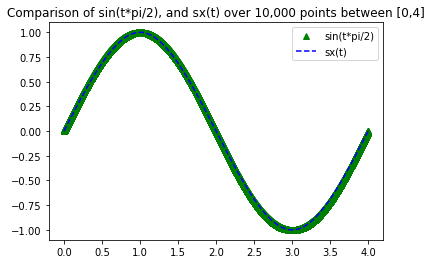

In [96]:
# here we plot
sDomainPlot = np.linspace(0,4,10000)
sinPlotValues = [np.sin(t*np.pi/2) for t in sDomainPlot]
sxPlotValues = [sx(t) for t in sDomainPlot]


plt.title("Comparison of sin(t*pi/2), and sx(t) over 10,000 points between [0,4]")
plt.plot(sDomainPlot, sinPlotValues, 'g^', sDomainPlot, sxPlotValues, 'b--');
plt.legend(["sin(t*pi/2)", "sx(t)"]);

#### c) Plot $s_y(t)$ and $cos(t\pi/2)$ on the interval [0,4).

Here is the list of parameters computed:
[[ 1.00000000e+00]
 [-2.66453526e-15]
 [-1.50000000e+00]
 [ 5.00000000e-01]
 [ 1.00000000e+00]
 [ 2.59052039e-15]
 [-1.50000000e+00]
 [ 5.00000000e-01]
 [ 9.00000000e+00]
 [-1.20000000e+01]
 [ 4.50000000e+00]
 [-5.00000000e-01]
 [ 9.00000000e+00]
 [-1.20000000e+01]
 [ 4.50000000e+00]
 [-5.00000000e-01]]



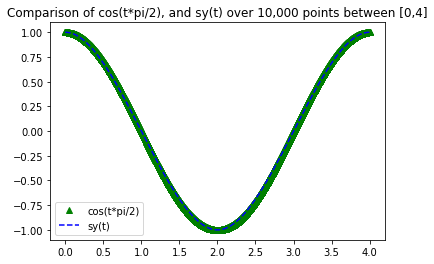

In [143]:
# we just need to change the b matrix with the new ys, the rest is repeated.
b2 = np.matrix([
    [1],
    [0],
    [0],
    [-1],
    [-1],
    [0],
    [0],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
])
x2 = np.linalg.solve(A1, b2)

print("Here is the list of parameters computed:\n{}\n".format(x2))

def sy(t):
    if t >= 0 and t < 1:
        return float(x2[0] + x2[1] * t + x2[2] * (t ** 2) + x2[3] * (t ** 3))
    if t < 2:
        return float(x2[4] + x2[5] * t + x2[6] * (t ** 2) + x2[7] * (t ** 3))
    if t < 3:
        return float(x2[8] + x2[9] * t + x2[10] * (t ** 2) + x2[11] * (t ** 3))
    if t <= 4:
        return float(x2[12] + x2[13] * t + x2[14] * (t ** 2) + x2[15] * (t ** 3))

#sy = scipy.interpolate.interp1d([0, 1, 2, 3, 4], [1, 0, -1, 0, 1], kind='cubic')

cosPlotValues = [np.cos(t*np.pi/2) for t in sDomainPlot]
syPlotValues = [sy(t) for t in sDomainPlot]


plt.title("Comparison of cos(t*pi/2), and sy(t) over 10,000 points between [0,4]")
plt.plot(sDomainPlot, cosPlotValues, 'g^', sDomainPlot, syPlotValues, 'b--');
plt.legend(["cos(t*pi/2)", "sy(t)"]);

#### d) Plot $s_x(t)$ and $s_y(t)$ on the interval [0,4), and estimate $\pi$ to at least five decimal places.

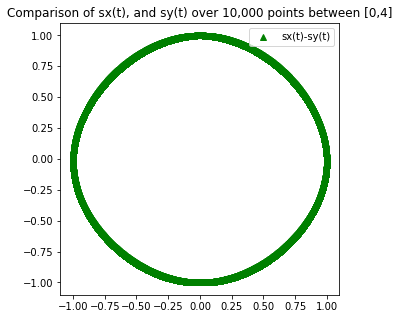

In [144]:
plt.figure(figsize=(5,5))
plt.title("Comparison of sx(t), and sy(t) over 10,000 points between [0,4]")
plt.plot([sx(t) for t in sDomainPlot], syPlotValues, 'g^');
plt.legend(["sx(t)-sy(t)"]);


In [172]:
# I integrate sx, and note that I use the absolute value of sx so that we don't cancel out the negative area
parametricCurveArea, _ = scipy.integrate.quad(lambda x: abs(sx(x)), 0, 4)

The result of this integral is $Area = \int_0^4 |sin(\frac{t\pi}{2})| dt = \frac{8}{\pi}$

So, $\pi = \frac{8}{Area}$...

In [176]:
ourPi = 8 / parametricCurveArea
print("Our approximate pi: {}\nThe relative error is: {}%\n".format(ourPi, (ourPi - np.pi)/np.pi*100)) 

Our approximate pi: 3.2000000000000033
The relative error is: 1.8591635788131236%



... which is close enough!

### Question 5: Image reconstruction using low light

#### a) Reconstruct the regular photo

In [88]:
def reconstruct(path="objects/"):
    L = 3 # number of color channels in immage
    M = 600 # number of rows in image
    N = 800 # number of columns in image

    # Read the images into arrays
    imgA = io.imread("{}regular.png".format(path)) / 255
    imgB = io.imread("{}low1.png".format(path)) / 255
    imgC = io.imread("{}low2.png".format(path)) / 255
    imgD = io.imread("{}low3.png".format(path)) / 255
    imgs = [imgA, imgB, imgC, imgC]

    fb = np.zeros((3,3))
    fc = np.zeros((3,3))
    fd = np.zeros((3,3))
    pconst = []

    bigA = []
    for i in range(M):
        for j in range(N):
            bigA.append([imgB[i][j][0], imgB[i][j][1], imgB[i][j][2], imgC[i][j][0], imgC[i][j][1], imgC[i][j][2], imgD[i][j][0], imgD[i][j][1], imgD[i][j][2], 1])

    for c in range(L):
        b = []

        for i in range(M):
            for j in range(N):
                b.append([imgA[i][j][c]])

        solution = np.linalg.lstsq(bigA, b)
        lstsqSolution = solution[0]
        print(lstsqSolution)

        for i in range(L):
            fb[c][i] = lstsqSolution[i][0]
            fc[c][i] = lstsqSolution[i+3][0]
            fd[c][i] = lstsqSolution[i+6][0]
        pconst.append(lstsqSolution[9])

    print(fb)
    print(fc)
    print(fd)
    print(pconst)

    imgResult = [[0 for i in range(N)] for j in range(M)]
    for i in range(M*N):
        pb = np.matrix([[bigA[i][0]], [bigA[i][1]], [bigA[i][2]]])
        pc = np.matrix([[bigA[i][3]], [bigA[i][4]], [bigA[i][5]]])
        pd = np.matrix([[bigA[i][6]], [bigA[i][7]], [bigA[i][8]]])

        pa = np.asarray(np.transpose(fb * pb + fc * pc + fd * pd + pconst))[0]

        imgResult[i // N][i % N] = list(map(lambda val: -1. if val < -1 else 1. if val > 1 else val, pa))
    print("done")
    return imgResult

q4a = reconstruct()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


[[ 1.5548013 ]
 [ 0.72566254]
 [-1.37030476]
 [-0.18472715]
 [ 0.18138465]
 [ 0.32222399]
 [ 0.77469911]
 [-0.62014575]
 [-2.21131807]
 [ 0.06091733]]
[[ 0.80570412]
 [ 1.80281398]
 [-1.7184254 ]
 [-0.36957958]
 [ 0.58711053]
 [ 0.29750114]
 [-0.16700119]
 [ 0.19949871]
 [-1.57263159]
 [ 0.04468686]]
[[ 0.68068539]
 [-0.28544404]
 [-0.36437461]
 [-0.06315937]
 [ 0.38776738]
 [ 1.0048939 ]
 [-0.31005226]
 [-0.30350935]
 [ 0.70675161]
 [-0.00625387]]
[[ 1.5548013   0.72566254 -1.37030476]
 [ 0.80570412  1.80281398 -1.7184254 ]
 [ 0.68068539 -0.28544404 -0.36437461]]
[[-0.18472715  0.18138465  0.32222399]
 [-0.36957958  0.58711053  0.29750114]
 [-0.06315937  0.38776738  1.0048939 ]]
[[ 0.77469911 -0.62014575 -2.21131807]
 [-0.16700119  0.19949871 -1.57263159]
 [-0.31005226 -0.30350935  0.70675161]]
[array([0.06091733]), array([0.04468686]), array([-0.00625387])]
done


In [90]:
io.imsave("q4a.png",q4a)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Which yields images that are not discernable one from another

![difference](q4aComparison.png)

#### b) Reconstruct the bears image

In [89]:
q4b = reconstruct("bears/")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


[[-0.53407804]
 [ 0.33409064]
 [-0.54228894]
 [ 0.45414896]
 [-0.15617377]
 [-0.04745726]
 [ 1.6144717 ]
 [ 0.32925748]
 [-1.51698199]
 [ 0.09729415]]
[[-0.58830561]
 [ 1.89886804]
 [-1.41845482]
 [ 0.4934378 ]
 [ 0.86573698]
 [ 0.12922298]
 [ 0.11483303]
 [ 0.14379726]
 [-1.3046666 ]
 [ 0.08303017]]
[[-0.10388996]
 [ 0.25321845]
 [-0.22574874]
 [ 0.3019426 ]
 [ 0.41825296]
 [ 0.78822098]
 [-0.1447048 ]
 [-0.56226902]
 [ 0.76188169]
 [ 0.0150218 ]]
[[-0.53407804  0.33409064 -0.54228894]
 [-0.58830561  1.89886804 -1.41845482]
 [-0.10388996  0.25321845 -0.22574874]]
[[ 0.45414896 -0.15617377 -0.04745726]
 [ 0.4934378   0.86573698  0.12922298]
 [ 0.3019426   0.41825296  0.78822098]]
[[ 1.6144717   0.32925748 -1.51698199]
 [ 0.11483303  0.14379726 -1.3046666 ]
 [-0.1447048  -0.56226902  0.76188169]]
[array([0.09729415]), array([0.08303017]), array([0.0150218])]
done


In [91]:
io.imsave("q4b.png",q4b)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Again, if we compare our generated image `q4b.png` to the regular one, there's no visible difference.

![difference](q4bComparison.png)